**Run the code in google colab**

* **Connect Runtime to GPU/TPU to Run Quick Execution of Code**
  - Note: Once code is execution is done disconnect gpu/tpu

* **Checking GPU Connection After Connecting to Runtime**

In [ ]:
!nvidia-smi

Tue Apr 22 10:12:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

* **Connecting to Drive Folder**

### **Train YOLOv8 on Custom Data**

**Steps:**

0. Take Business Goal for Object Recognition
1. Collect Images (X Data) with multiple objects for the above goal and store them in images folder
      - Folder Structure
        - images
2. Prepare Annotations (y Data) for the collected Images
      - According to Algorithm we need to do annotations
      - For YOLO Annotations format should be .txt file for each image with objects details
        - .txt file contains
          - classid, x, y, w, h

      - Folder Structure
        - images
        - labels (.txt files)
3. Balance Image Names with Label Names in two folders (Validation)
4. Once We have images and labels (annotations) then split the data into train-validation-test, following below folder structure
      - train
        - images
        - labels
      - validation
        - images
        - labels
      - test
        - images
        - labels
    - Create a yaml file mentioning paths of above train-valid-test folders along with class names
5. Model Training
    - Install Ultralytics package for YOLO
    - Import Yolo from ultralytics
    - Load any pretrained yolo weights
    - train Model with yaml file along with epochs
    - Predictions

### 0. Object Recognition Task

* Recognition of African WildLife Animals

### **1. Images Collection** - X

* **Collect & Store the images in a folder called images for yolo training**
    * Folder structure will be look like below

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
pwd

'/content'

In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_path = "/content/styles.zip"  # Replace with your actual file path

# Extraction directory
extract_dir = "/content/dataset/"

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete!")

Extraction complete!


In [ ]:
# Changing Working Directory to Source Code Folder

os.chdir("/content/dataset/Styles")

In [ ]:
pwd

'/content/dataset/Styles'

In [ ]:
os.listdir()

['val', 'train', 'test']

In [ ]:
os.listdir("train")

['labels', 'images']

In [ ]:
os.listdir("val")

['labels', 'images']

In [ ]:
os.listdir("test")

['labels', 'images']

**4. Creation of config file (yaml) for training**

* We need to create a file for the training , which contains the path of images along with labels

* file name extension should be **.yaml**

* refer & edit the **data.yaml** file given according to your project

**5. Training Model**

**To Train model , we need YOLO trained algorithm along with previous trained weights file**

* Yolo offered by the ultralytics github profile
* Using pip install

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Importing Yolo

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


* **Downloading yolov8 pretrained weights file yolov8n.pt from github profile for training images and labels data**

In [ ]:
model = YOLO("yolov8n.pt")  # loading weights of a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


* **Training Model with Data**

In [ ]:
# Training Model

# Using train method with .yaml and epochs

model.train(data="/content/data.yaml", epochs=20)

# Check for file path errors if any in data.yaml

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 172.8±251.3 MB/s, size: 266.3 KB)


train: Scanning /content/dataset/Styles/train/labels... 872 images, 0 backgrounds, 0 corrupt: 100%|██████████| 872/872 [00:02<00:00, 416.02it/s]

train: /content/dataset/Styles/train/images/Salwar Kameez worn by Muslim women in Andhra Pradesh_Image_17.jpg: corrupt JPEG restored and saved
train: New cache created: /content/dataset/Styles/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 36.1±28.0 MB/s, size: 260.5 KB)


val: Scanning /content/dataset/Styles/val/labels... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 401.68it/s]

val: New cache created: /content/dataset/Styles/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.13G      1.391      1.846      1.571         34        640: 100%|██████████| 55/55 [00:24<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        125        235      0.656      0.455      0.489      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.63G      1.425      1.535      1.544         47        640: 100%|██████████| 55/55 [00:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        125        235      0.637      0.596      0.555      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.65G      1.501        1.5      1.613         28        640: 100%|██████████| 55/55 [00:22<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        125        235      0.505      0.549      0.509      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.67G      1.478      1.397      1.588         34        640: 100%|██████████| 55/55 [00:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        125        235       0.76      0.494      0.613       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.69G       1.47      1.383      1.578         24        640: 100%|██████████| 55/55 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        125        235       0.59      0.494      0.512       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.71G       1.43      1.258      1.553         36        640: 100%|██████████| 55/55 [00:21<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        125        235      0.462      0.519      0.422      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.72G      1.422      1.323      1.543         26        640: 100%|██████████| 55/55 [00:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        125        235       0.86      0.694      0.768      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.74G      1.347      1.177      1.499         21        640: 100%|██████████| 55/55 [00:21<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        125        235      0.837      0.774      0.828      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.76G      1.363      1.137       1.49         18        640: 100%|██████████| 55/55 [00:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        125        235      0.881      0.779      0.816      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.77G      1.297      1.088      1.467         33        640: 100%|██████████| 55/55 [00:20<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        125        235      0.822      0.727      0.788      0.451


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.79G      1.279      1.045      1.554         19        640: 100%|██████████| 55/55 [00:22<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        125        235       0.85      0.798      0.823       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.81G       1.29      1.005      1.539         23        640: 100%|██████████| 55/55 [00:20<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        125        235      0.859      0.783      0.833      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.82G      1.269     0.9176      1.511         13        640: 100%|██████████| 55/55 [00:20<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        125        235      0.895      0.723      0.825      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.84G       1.19     0.8651      1.476         11        640: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        125        235      0.862      0.823      0.846      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.85G      1.193     0.8739      1.464         15        640: 100%|██████████| 55/55 [00:20<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        125        235      0.893        0.8      0.851      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.88G      1.177     0.8058      1.451         11        640: 100%|██████████| 55/55 [00:20<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        125        235      0.833      0.846      0.859      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.89G      1.142     0.7696      1.427         20        640: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        125        235      0.901      0.814      0.851       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.91G      1.111     0.7322      1.396         13        640: 100%|██████████| 55/55 [00:21<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        125        235      0.882      0.829      0.868      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.92G      1.098     0.7131      1.387         17        640: 100%|██████████| 55/55 [00:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        125        235       0.89      0.825       0.87      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.94G      1.052     0.6789      1.345         13        640: 100%|██████████| 55/55 [00:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        125        235      0.903      0.813      0.859       0.56



20 epochs completed in 0.132 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


                   all        125        235      0.903      0.813      0.859      0.559
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e77aa876b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**6. Inference (Predictions) on validation data**

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2500.0±1582.8 MB/s, size: 672.2 KB)


val: Scanning /content/dataset/Styles/val/labels.cache... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        125        235      0.905      0.811       0.86      0.563
Speed: 4.1ms preprocess, 12.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train2


* **Prediction on Single Image**

In [ ]:
model.predict('/content/Maharastra women in Paithani Saree_Image_5.jpg', save=True, imgsz=640, conf=0.3)


image 1/1 /content/Maharastra women in Paithani Saree_Image_5.jpg: 640x480 1 Style, 40.2ms
Speed: 2.9ms preprocess, 40.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Style'}
 obb: None
 orig_img: array([[[221, 227, 226],
         [221, 227, 226],
         [221, 227, 226],
         ...,
         [200, 213, 215],
         [200, 213, 215],
         [200, 213, 215]],
 
        [[221, 227, 226],
         [221, 227, 226],
         [221, 227, 226],
         ...,
         [200, 213, 215],
         [200, 213, 215],
         [200, 213, 215]],
 
        [[221, 227, 226],
         [221, 227, 226],
         [221, 227, 226],
         ...,
         [200, 213, 215],
         [200, 213, 215],
         [200, 213, 215]],
 
        ...,
 
        [[191, 210, 213],
         [191, 210, 213],
         [191, 210, 213],
         ...,
         [188, 204, 210],
         [188, 204, 210],
         [188, 204, 210]],
 
        [[191, 210, 213],
         [191, 210, 213],
         [191, 210, 213],
         ...,
         [188, 204,

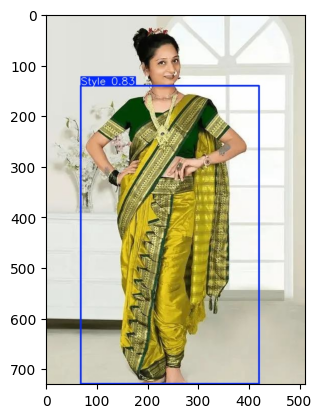

In [ ]:
# Loading Predicted Image (Check Save Dir in Above Prediction)
sampleimg = mpimg.imread("/content/dataset/Styles/runs/detect/train3/Maharastra women in Paithani Saree_Image_5.jpg")
plt.imshow(sampleimg)

* **30 Sec Video related to website**

In [ ]:
model.predict('/content/kerala.mp4', save=True, imgsz=640, conf=0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/172) /content/kerala.mp4: 384x640 4 Styles, 47.5ms
video 1/1 (frame 2/172) /content/kerala.mp4: 384x640 5 Styles, 6.6ms
video 1/1 (frame 3/172) /content/kerala.mp4: 384x640 6 Styles, 7.7ms
video 1/1 (frame 4/172) /content/kerala.mp4: 384x640 8 Styles, 7.1ms
video 1/1 (frame 5/172) /content/kerala.mp4: 384x640 6 Styles, 6.6ms
video 1/1 (frame 6/172) /content/kerala.mp4: 384x640 6 Styles, 6.4ms
video 1/1 (frame 7/172) /content/kerala.m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Style'}
 obb: None
 orig_img: array([[[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
    

In [ ]:
# Install moviepy if not already installed
!pip install moviepy

import moviepy.editor as mp
from IPython.display import HTML
from base64 import b64encode

# Convert .avi to .mp4
avi_path = "/content/dataset/Styles/runs/detect/train4/kerala.avi"
mp4_path = "/content/kerala_converted.mp4"

clip = mp.VideoFileClip(avi_path)
clip.write_videofile(mp4_path, codec="libx264")

# Display the .mp4 in Colab
mp4 = open(mp4_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")




  if event.key is 'enter':



Moviepy - Building video /content/kerala_converted.mp4.
Moviepy - Writing video /content/kerala_converted.mp4



t:  99%|█████████▉| 171/173 [00:01<00:00, 87.27it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/dataset/Styles/runs/detect/train4/kerala.avi, 691200 bytes wanted but 0 bytes read,at frame 172/173, at time 7.48/7.48 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/kerala_converted.mp4
